In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [2]:
data=np.load('./data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X=data['arr_0']
y=data['arr_1']
mean=data['arr_2']

In [21]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [5]:
x_train.shape,y_train.shape

((1329, 50), (1329,))

In [6]:
x_test.shape,y_test.shape

((333, 50), (333,))

In [7]:
# Using SVM(Support Vector Machine)
# Trainig ML model

In [8]:
from sklearn.svm import SVC

In [17]:
model=SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [18]:
model.fit(x_train,y_train)

SVC(gamma=0.01, probability=True)

In [19]:
# Score for training and test data
model.score(x_train,y_train)

0.8893905191873589

In [20]:
model.score(x_test,y_test)

0.8108108108108109

In [15]:
## Model Evaluation


In [16]:
#Confusion Matrix,Classification report,Kappa Score,ROC and AUC(Probability)

In [22]:
from sklearn import metrics

In [23]:
y_pred=model.predict(x_test)
y_prob=model.predict_proba(x_test) #probability

In [24]:
cm=metrics.confusion_matrix(y_test,y_pred)

In [25]:
cm

array([[ 97,  34],
       [ 29, 173]], dtype=int64)

In [27]:
cm=np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm

array([[ 97,  34],
       [ 29, 173],
       [126, 207]], dtype=int64)

In [28]:
cm=np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
cm

array([[ 97,  34, 131],
       [ 29, 173, 202],
       [126, 207, 333]], dtype=int64)

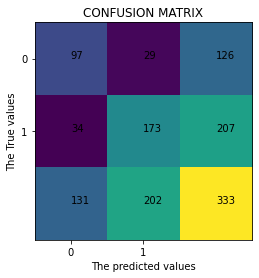

In [34]:
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('The predicted values')
plt.ylabel('The True values')
plt.title('CONFUSION MATRIX')
plt.show()

In [35]:
# Classification report
cr=metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)

In [36]:
cr

{'male': {'precision': 0.7698412698412699,
  'recall': 0.7404580152671756,
  'f1-score': 0.754863813229572,
  'support': 131},
 'female': {'precision': 0.8357487922705314,
  'recall': 0.8564356435643564,
  'f1-score': 0.8459657701711492,
  'support': 202},
 'accuracy': 0.8108108108108109,
 'macro avg': {'precision': 0.8027950310559007,
  'recall': 0.7984468294157661,
  'f1-score': 0.8004147917003606,
  'support': 333},
 'weighted avg': {'precision': 0.809821208371933,
  'recall': 0.8108108108108109,
  'f1-score': 0.8101268621851232,
  'support': 333}}

In [39]:
pd.DataFrame(cr)

,male,female,accuracy,macro avg,weighted avg
precision,0.769841,0.835749,0.810811,0.802795,0.809821
recall,0.740458,0.856436,0.810811,0.798447,0.810811
f1-score,0.754864,0.845966,0.810811,0.800415,0.810127
support,131.000000,202.000000,0.810811,333.000000,333.000000


In [40]:
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.769841,0.740458,0.754864,131.000000
female,0.835749,0.856436,0.845966,202.000000
accuracy,0.810811,0.810811,0.810811,0.810811
macro avg,0.802795,0.798447,0.800415,333.000000
weighted avg,0.809821,0.810811,0.810127,333.000000


In [41]:
# Kappa Score
metrics.cohen_kappa_score(y_test,y_pred)

0.6009244992295839

In [42]:
# ROC and AUC

In [43]:
# ROC for female
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

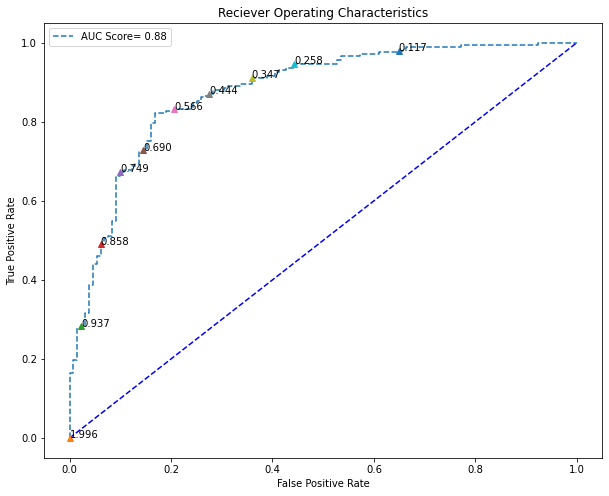

In [55]:
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),10):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.3f"%thresh[i])
    
plt.xlabel('False Positive Rate')
plt.legend(['AUC Score= %0.2f'%auc_s])
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')

In [56]:
#hyperparameter tuning

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
model_tune=SVC()

In [59]:
param_gr={'kernel':['rbf','poly'],
         'C':[1,10,20,30,50,100],
         'gamma':[0.1,0.2,0.01,0.001,0.002,0.003,0.005,0.05],
         'coef0':[0,1]}

In [60]:
model_grid=GridSearchCV(model_tune,param_grid=param_gr,scoring='accuracy',cv=5,verbose=1)

In [61]:
model_grid.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:  1.8min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.2, 0.01, 0.001, 0.002, 0.003, 0.005,
                                   0.05],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [62]:
model_grid.best_index_

21

In [63]:
model_grid.best_params_

{'C': 1, 'coef0': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [65]:
model_grid.best_score_

0.8212959947899707

In [69]:
model_best=SVC(C=1,kernel='poly',gamma=0.01,coef0=1,probability=True)

In [70]:
model_best.fit(x_train,y_train)

SVC(C=1, coef0=1, gamma=0.01, kernel='poly', probability=True)

In [71]:
model_best.score(x_test,y_test)

0.8138138138138138

In [75]:
y_pred=model_best.predict(x_test)
y_prob=model_best.predict_proba(x_test) #probability

In [76]:
metrics.cohen_kappa_score(y_test,y_pred)

0.6077887537993921

Text(0.5, 1.0, 'Reciever Operating Characteristics')

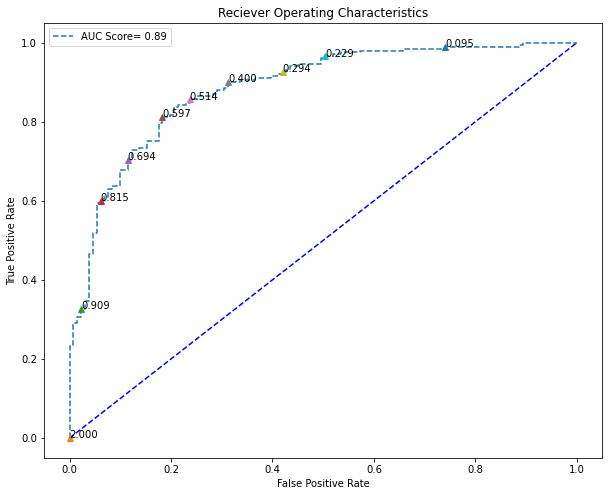

In [77]:
fpr,tpr,thresh=metrics.roc_curve(y_test,y_prob[:,1])
auc_s=metrics.auc(fpr,tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,'--')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),10):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.3f"%thresh[i])
    
plt.xlabel('False Positive Rate')
plt.legend(['AUC Score= %0.2f'%auc_s])
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')

In [78]:
# Saving our model in pickle format
import pickle


In [79]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [80]:
pickle.dump(mean,open('./model/mean_preprocess.pickle','wb'))